<a href="https://colab.research.google.com/github/tiagopessoalima/ED2/blob/main/Aula_Semana_06_(ED2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Listas Circulares (Encadeadas)**

É uma estrutura de dados caracterizada pela configuração de ponteiros de seus nós. Distingue-se de listas ligadas lineares pelo fato de que o ponteiro do último nó (nó `fim` ou `tail`) não aponta para um valor nulo (NULL/None), mas sim referencia o primeiro nó (nó `inicio` ou head) da lista. Esta configuração estabelece um ciclo fechado, eliminando a demarcação explícita de fim de sequência.

Estruturalmente, podem ser:

1.  **Simplesmente Ligada:** Cada nó $N_i$ possui um ponteiro `próximo` referenciando $N_{i+1}$. O ponteiro `próximo` do nó terminal $N_{fim}$ referencia $N_{inicio}$.
2.  **Duplamente Ligada:** Cada nó $N_i$ possui ponteiros `próximo` (referenciando $N_{i+1}$) e `anterior` (referenciando $N_{i-1}$). O ponteiro `próximo` do nó terminal $N_{fim}$ referencia $N_{inicio}$, e o ponteiro `anterior` do nó inicial $N_{inicio}$ referencia $N_{fim}$.

A ausência de um terminador nulo implica que operações de travessia e manipulação requerem um mecanismo explícito para identificar o ponto de início e determinar a condição de parada, geralmente comparando o nó atual com uma referência conhecida, como o nó *inicio*.


## **O Bloco de Construção: O Nó Circular**

 Embora as listas ligadas circulares possam ser simplesmente ligadas (onde o nó possui apenas referência para o próximo elemento, e o último aponta para o primeiro), nossa atenção será direcionada para o nó conforme utilizado em uma lista duplamente ligada circular.

In [1]:
class NoCircular:
    """
    Representa um único nó em uma lista duplamente ligada circular.
    """
    def __init__(self, valor):
        """
        Inicializa um novo nó circular.

        Parâmetros:
            valor: Dado a ser armazenado no nó.
        """
        self.valor = valor          # Valor armazenado no nó
        self.proximo = self         # Aponta inicialmente para si mesmo
        self.anterior = self        # Aponta inicialmente para si mesmo

    def __repr__(self):
        """
        Representação textual do nó circular.
        """
        return f"NoCircular({self.valor})"

### **Exemplo de Criação e Encadeamento de Nós**

In [2]:
# Criando quatro nós
n1 = NoCircular("A")
n2 = NoCircular("B")
n3 = NoCircular("C")
n4 = NoCircular("D")

# Encadeando para frente
n1.proximo = n2
n2.proximo = n3
n3.proximo = n4
n4.proximo = n1  # Fecha o ciclo: último aponta para o primeiro

# Encadeando para trás
n2.anterior = n1
n3.anterior = n2
n4.anterior = n3
n1.anterior = n4  # Fecha o ciclo: primeiro aponta para o último

### **Imprimindo e Navegando nos Nós**

In [3]:
# Navegação para frente
print(n4)                                  # NoDuplo(D)
print(n4.proximo)                          # NoDuplo(A)
print(n4.proximo.proximo)                  # NoDuplo(B)
print(n4.proximo.proximo.proximo)          # NoDuplo(C)
print(n4.proximo.proximo.proximo.proximo)  # NoDuplo(D)

NoCircular(D)
NoCircular(A)
NoCircular(B)
NoCircular(C)
NoCircular(D)


In [4]:
# Navegação para trás
print(n1)                                     # NoDuplo(A)
print(n1.anterior)                            # NoDuplo(D)
print(n1.anterior.anterior)                   # NoDuplo(C)
print(n1.anterior.anterior.anterior)          # NoDuplo(B)
print(n1.anterior.anterior.anterior.anterior) # NoDuplo(A)

NoCircular(A)
NoCircular(D)
NoCircular(C)
NoCircular(B)
NoCircular(A)


> Em uma lista ligada circular, nunca atingimos None. Ao tentar ir para anterior a partir do primeiro nó, a referência nos leva ao último nó. De forma similar, ao tentar ir para proximo a partir do último nó, a referência nos leva de volta ao primeiro nó.








## **Visualização Conceitual**

```
      Nó Início / Cabeça                                       Nó Último / Cauda
      ┌───────────┐     ┌───────────┐     ┌───────────┐     ┌───────────┐
┌─────│ anterior  │<----│ anterior  │<----│ anterior  │<----│ anterior  │<────┐ (Ponteiros Anterior)
|     │     "A"   │     │     "B"   │     │     "C"   │     │     "D"   │     |
|     │  proximo  │---->│  proximo  │---->│  proximo  │---->│  proximo  │─────|─┐ (Ponteiros Proximo)
|     └───────────┘     └───────────┘     └───────────┘     └───────────┘     |   |
|        ▲                                                                    |   |
|        |                                                                    |   |
|        | (Aponta para o Nó "D")                                             |   |
|        |                                                                    |   |
└────────|--------------------------------------------------------------------┘   |
         └-----------------------------------------------------------------------┘ (Aponta para o Nó "A")
```

## **Classe Lista Circular**

Será implementada uma estrutura que mantém uma única referência ao nó `inicio` (head), sendo o nó `fim` (tail) acessível por meio do ponteiro `inicio.anterior`. Devido à conectividade bidirecional dos nós e à característica circular da lista, operações de inserção e remoção em ambas as extremidades possuem complexidade **O(1)**. Essa eficiência contrasta com a das listas simplesmente ligadas, nas quais tais operações podem requerer **tempo O(n)**, especialmente na extremidade final, devido à necessidade de percorrer os nós.

### **Integração com a Sintaxe do Python**

A classe também implementa métodos especiais (*dunder methods*) que viabilizam sua integração com as operações nativas da linguagem Python, como `len()` (através de `__len__`), iteração com `for` (`__iter__` e `__next__`), acesso indexado (`__getitem__`), verificação de pertencimento (`__contains__`) e representação textual (`__str__` e `__repr__`). Essa sobrecarga de operadores torna a estrutura compatível com o protocolo de coleções do Python, promovendo uma interface mais idiomática e alinhada às expectativas da linguagem.


### **Implementação**

In [5]:
class NoCircular:
    def __init__(self, valor=None):
        self.valor = valor
        self.proximo = self  # Aponta para ele mesmo (sentinela no caso de lista circular)
        self.anterior = self  # Aponta para ele mesmo (sentinela no caso de lista circular)

class ListaCircularDupla:
    """
    Implementa uma lista duplamente ligada circular com sentinela.
    """

    def __init__(self):
        """
        Inicializa a lista como vazia.
        """
        self.sentinela = NoCircular()  # Nó sentinela, sem valor
        self.sentinela.proximo = self.sentinela
        self.sentinela.anterior = self.sentinela
        self._tamanho = 0

    def limpar(self) -> None:
        """
        Remove todos os elementos da lista.
        """
        self.sentinela.proximo = self.sentinela
        self.sentinela.anterior = self.sentinela
        self._tamanho = 0

    def esta_vazia(self) -> bool:
        """
        Verifica se a lista está vazia.
        """
        return self._tamanho == 0

    def _no_em(self, posicao: int) -> NoCircular:
        """
        Retorna o nó da posição especificada, utilizando busca circular eficiente.
        (Método interno)
        """
        if not 0 <= posicao < self._tamanho:
            raise IndexError("Índice fora do intervalo.")

        no = self.sentinela.proximo
        if posicao < self._tamanho // 2:
            for _ in range(posicao):
                no = no.proximo
        else:
            no = self.sentinela
            for _ in range(self._tamanho - posicao):
                no = no.anterior
        return no

    def inserir_no_inicio(self, valor: any) -> None:
        """
        Insere um novo elemento no início da lista. O(1)
        """
        novo_no = NoCircular(valor)
        if self.esta_vazia():
            self.sentinela.proximo = novo_no
            self.sentinela.anterior = novo_no
            novo_no.proximo = self.sentinela
            novo_no.anterior = self.sentinela
        else:
            primeiro = self.sentinela.proximo
            self.sentinela.proximo = novo_no
            novo_no.proximo = primeiro
            novo_no.anterior = self.sentinela
            primeiro.anterior = novo_no
        self._tamanho += 1

    def inserir_no_final(self, valor: any) -> None:
        """
        Insere um novo elemento no final da lista. O(1)
        """
        if self.esta_vazia():
            self.inserir_no_inicio(valor)
        else:
            novo_no = NoCircular(valor)
            ultimo = self.sentinela.anterior
            ultimo.proximo = novo_no
            novo_no.anterior = ultimo
            novo_no.proximo = self.sentinela
            self.sentinela.anterior = novo_no
        self._tamanho += 1

    def remover_do_inicio(self) -> any:
        """
        Remove e retorna o primeiro elemento da lista. O(1)
        """
        if self.esta_vazia():
            raise IndexError("A lista está vazia.")

        primeiro = self.sentinela.proximo
        valor_removido = primeiro.valor
        if self._tamanho == 1:
            self.sentinela.proximo = self.sentinela
            self.sentinela.anterior = self.sentinela
        else:
            self.sentinela.proximo = primeiro.proximo
            primeiro.proximo.anterior = self.sentinela
        self._tamanho -= 1
        return valor_removido

    def remover_do_final(self) -> any:
        """
        Remove e retorna o último elemento da lista. O(1)
        """
        if self.esta_vazia():
            raise IndexError("A lista está vazia.")

        ultimo = self.sentinela.anterior
        valor_removido = ultimo.valor
        if self._tamanho == 1:
            self.sentinela.proximo = self.sentinela
            self.sentinela.anterior = self.sentinela
        else:
            self.sentinela.anterior = ultimo.anterior
            ultimo.anterior.proximo = self.sentinela
        self._tamanho -= 1
        return valor_removido

    def __len__(self) -> int:
        """
        Retorna o número de elementos da lista.
        """
        return self._tamanho

    def __iter__(self):
        """
        Permite iteração direta sobre a lista com `for`.
        """
        atual = self.sentinela.proximo
        for _ in range(self._tamanho):
            yield atual.valor
            atual = atual.proximo

    def __getitem__(self, posicao: int) -> any:
        """
        Permite acesso por índice, como em listas comuns.
        """
        return self._no_em(posicao).valor

    def __contains__(self, valor: any) -> bool:
        """
        Verifica se um valor está presente na lista.
        """
        return any(elemento == valor for elemento in self)

    def __repr__(self) -> str:
        """
        Representação textual da lista.
        """
        elementos = [str(valor) for valor in self]
        return " <-> ".join(elementos) + " (circular)"


#### **Análise de Complexidade**

O uso de um nó sentinela com ligações circulares, junto aos ponteiros anterior e proximo em cada nó, permite otimizar operações nas extremidades e simplifica a lógica da lista.

### Métodos de uma Lista Duplamente Encadeada Circular

| Método              | Finalidade                                                      | Complexidade | Notas                                                                 |
|---------------------|------------------------------------------------------------------|--------------|-----------------------------------------------------------------------|
| `__init__`          | Inicializa a lista vazia                                         | O(1)         | Nó sentinela pode ser usado para facilitar circularidade              |
| `limpar`            | Remove todos os elementos                                        | O(1)         | Apenas reseta ponteiros no nó sentinela                               |
| `esta_vazia`        | Verifica se a lista está vazia                                   | O(1)         | Verifica se o nó sentinela aponta para ele mesmo                      |
| `__len__`           | Retorna o número de elementos (`len(lista)`)                     | O(1)         | Mantém contador interno                                               |
| `__contains__`      | Verifica se um valor está na lista (`valor in lista`)            | O(n)         | Percorre nós até voltar ao sentinela                                  |
| `__getitem__`       | Acessa um elemento por índice (`lista[i]`)                       | O(n)         | Pode iniciar do início ou fim (circularidade otimiza wraparound)      |
| `__setitem__`       | Modifica um elemento por índice (`lista[i] = valor`)             | O(n)         | Mesmo acesso otimizado que o `__getitem__`                            |
| `__iter__`          | Permite iteração `for item in lista` (início → fim)              | O(n)         | Itera até encontrar o sentinela novamente                             |
| `__reversed__`      | Permite iteração `for item in reversed(lista)` (fim → início)    | O(n)         | Vantagem da dupla ligação e circularidade                             |
| `__str__`           | Representação legível (`print(lista)`)                           | O(n)         | Percorre até retornar ao início                                       |
| `__repr__`          | Representação técnica                                             | O(1)         | Apenas nome e tamanho                                                 |
| `inserir_no_inicio` | Insere no início da lista                                        | O(1)         | Entre sentinela e primeiro elemento                                   |
| `inserir_no_final`  | Insere no final da lista                                         | O(1)         | Entre último elemento e sentinela                                     |
| `inserir_em`        | Insere em posição específica                                     | O(n)         | Pode usar `_no_em` para acesso otimizado                              |
| `remover_do_inicio` | Remove e retorna o primeiro elemento                             | O(1)         | Remove o nó após o sentinela                                          |
| `remover_do_final`  | Remove e retorna o último elemento                               | O(1)         | Remove o nó antes do sentinela                                        |
| `remover_em`        | Remove e retorna o elemento de posição específica                | O(n)         | Usa `_no_em` para encontrar o nó                                      |
| `_no_em` (interno)  | Retorna o nó da posição (otimizado)                              | O(n)         | Usa direção com menor distância (início/fim)                          |
| `posicao_de`        | Encontra índice do valor                                         | O(n)         | Para quando encontra valor ou retorna ao sentinela                    |


#### **Exemplos de Uso**

A seguir, demonstramos como utilizar os principais métodos da classe ListaCircularDupla:

##### **Criando uma Lista**

In [6]:
lista_circular = ListaCircularDupla()

##### **Verificando se a Lista Está Vazia**

In [7]:
print(lista_circular.esta_vazia()) # Saída: True

True


##### **Inserindo Elementos no Início**

In [8]:
lista_circular.inserir_no_inicio("C")  # Lista: C (circular)
lista_circular.inserir_no_inicio("B")  # Lista: B <-> C (circular)
lista_circular.inserir_no_inicio("A")  # Lista: A <-> B <-> C (circular)

##### **Inserindo Elementos no Final**

In [9]:
lista_circular.inserir_no_final("D")   # Lista: A <-> B <-> C <-> D (circular)
lista_circular.inserir_no_final("E")   # Lista: A <-> B <-> C <-> D <-> E (circular)

##### **Exibindo a Lista**

In [10]:
print(lista_circular) # Saída: A <-> B <-> C <-> D <-> E (circular)

A <-> B <-> C <-> D <-> E (circular)


##### **Removendo Elementos no Início**

In [11]:
lista_circular.remover_do_inicio() # Saída: A. Lista: B <-> C <-> D <-> E (circular)

'A'

##### **Removendo Elementos no Fim**

In [12]:
lista_circular.remover_do_final() # Saída: E. Lista: B <-> C <-> D (circular)

'E'

##### **Tamanho da Lista**

In [13]:
print(len(lista_circular)) # Saída: 3

3


##### **Acessando Elemento pelo Índice**

In [14]:
print(lista_circular[2]) # Saída: D

D


##### **Iterando Sobre os Elementos**

In [15]:
for valor in lista_circular: # Saída: B | C | D |
    print(valor, end=" | ")

B | C | D | 

##### **Verificando se um Elemento Está na Lista (Usando `in`)**

In [16]:
print("C" in lista_circular) # Saída: True

print("Z" in lista_circular) # Saída: False

True
False


Iniciando benchmark de inserção e remoção...
Testando inserção e remoção de 10 elementos (média de 30 execuções)...
  Lista Dupla: 0.000008s | Lista Circular: 0.000016s | Lista Simples: 0.000008s
Testando inserção e remoção de 100 elementos (média de 30 execuções)...
  Lista Dupla: 0.000071s | Lista Circular: 0.000076s | Lista Simples: 0.000276s
Testando inserção e remoção de 1000 elementos (média de 30 execuções)...
  Lista Dupla: 0.000931s | Lista Circular: 0.003562s | Lista Simples: 0.024486s
Testando inserção e remoção de 10000 elementos (média de 30 execuções)...
  Lista Dupla: 0.016120s | Lista Circular: 0.017560s | Lista Simples: 1.656077s
Benchmark concluído.


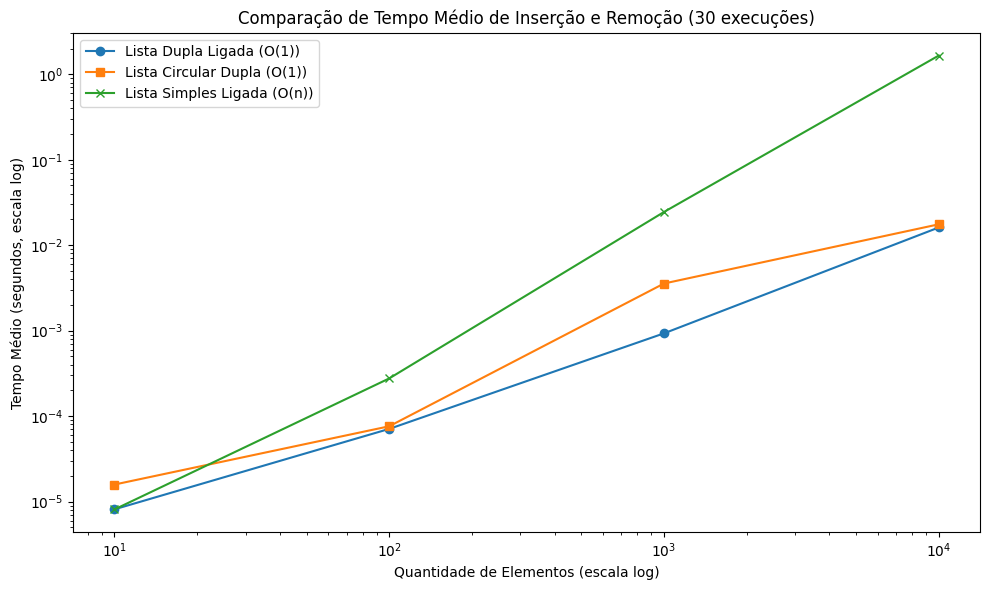

In [17]:
import time
import matplotlib.pyplot as plt

# Lista Simplesmente Ligada
class NoSimples:
    def __init__(self, valor):
        self.valor = valor
        self.proximo = None

class ListaSimples:
    def __init__(self):
        self.inicio = None

    def inserir_no_final(self, valor):
        novo = NoSimples(valor)
        if self.inicio is None:
            self.inicio = novo
        else:
            atual = self.inicio
            while atual.proximo:
                atual = atual.proximo
            atual.proximo = novo

    def remover_do_inicio(self):
        if self.inicio:
            self.inicio = self.inicio.proximo

# Lista Duplamente Ligada
class NoDuplo:
    def __init__(self, valor):
        self.valor = valor
        self.proximo = None
        self.anterior = None

class ListaDupla:
    def __init__(self):
        self.inicio = None
        self.fim = None

    def inserir_no_final(self, valor):
        novo = NoDuplo(valor)
        if self.inicio is None:
            self.inicio = self.fim = novo
        else:
            self.fim.proximo = novo
            novo.anterior = self.fim
            self.fim = novo

    def remover_do_inicio(self):
        if self.inicio:
            self.inicio = self.inicio.proximo
            if self.inicio:
                self.inicio.anterior = None

# Lista Circular Duplamente Ligada
class NoCircularDuplo:
    def __init__(self, valor=None):
        self.valor = valor
        self.proximo = self
        self.anterior = self

class ListaCircularDupla:
    def __init__(self):
        self.sentinela = NoCircularDuplo()  # Nó sentinela, sem valor

    def inserir_no_inicio(self, valor):
        novo = NoCircularDuplo(valor)
        # Insere entre o sentinela e o próximo
        novo.proximo = self.sentinela.proximo
        novo.anterior = self.sentinela
        self.sentinela.proximo.anterior = novo
        self.sentinela.proximo = novo

    def inserir_no_final(self, valor):
        novo = NoCircularDuplo(valor)
        novo.proximo = self.sentinela
        novo.anterior = self.sentinela.anterior
        self.sentinela.anterior.proximo = novo
        self.sentinela.anterior = novo

    def remover_do_inicio(self):
        if self.sentinela.proximo != self.sentinela:
            self.sentinela.proximo = self.sentinela.proximo.proximo
            self.sentinela.proximo.anterior = self.sentinela

# Função para Testes com Média de Execuções
def calcular_tempo_medio(func, qtd, execucoes=30):
    tempos = []
    for _ in range(execucoes):
        inicio = time.perf_counter()
        func(qtd)
        fim = time.perf_counter()
        tempos.append(fim - inicio)
    return sum(tempos) / execucoes

# Testes Específicos para Cada Estrutura
def teste_lista_dupla_final(qtd):
    lista = ListaDupla()
    for i in range(qtd):
        lista.inserir_no_final(i)
    lista.remover_do_inicio()  # Remover do início para testarmos a eficiência

def teste_lista_simples_final(qtd):
    lista = ListaSimples()
    for i in range(qtd):
        lista.inserir_no_final(i)
    lista.remover_do_inicio()  # Remover do início para testarmos a eficiência

def teste_lista_circular_final(qtd):
    lista = ListaCircularDupla()
    for i in range(qtd):
        lista.inserir_no_final(i)
    lista.remover_do_inicio()  # Remover do início para testarmos a eficiência

# Execução dos Testes
tamanhos = [10**i for i in range(1, 5)]
tempos_dupla = []
tempos_simples = []
tempos_circular = []

print("Iniciando benchmark de inserção e remoção...")
for tamanho in tamanhos:
    print(f"Testando inserção e remoção de {tamanho} elementos (média de 30 execuções)...")

    tempo_ldl = calcular_tempo_medio(teste_lista_dupla_final, tamanho)
    tempo_lcd = calcular_tempo_medio(teste_lista_circular_final, tamanho)

    if tamanho <= 10000:
        tempo_lsl = calcular_tempo_medio(teste_lista_simples_final, tamanho)
    else:
        tempo_lsl = float('inf')
        print("  Skipping Lista Simplesmente Ligada (O(n) insert at end is too slow)")

    print(f"  Lista Dupla: {tempo_ldl:.6f}s | Lista Circular: {tempo_lcd:.6f}s | Lista Simples: {tempo_lsl:.6f}s")

    tempos_dupla.append(tempo_ldl)
    tempos_circular.append(tempo_lcd)
    tempos_simples.append(tempo_lsl)

print("Benchmark concluído.")

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_dupla, label='Lista Dupla Ligada (O(1))', marker='o')
plt.plot(tamanhos, tempos_circular, label='Lista Circular Dupla (O(1))', marker='s')
if any(t != float('inf') for t in tempos_simples):
    plt.plot(
        tamanhos[:len([t for t in tempos_simples if t != float('inf')])],
        [t for t in tempos_simples if t != float('inf')],
        label='Lista Simples Ligada (O(n))', marker='x'
    )

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Quantidade de Elementos (escala log)')
plt.ylabel('Tempo Médio (segundos, escala log)')
plt.title('Comparação de Tempo Médio de Inserção e Remoção (30 execuções)')
plt.legend()
plt.tight_layout()
plt.show()
